<h1 style="text-align:center"> TRAVESSIAS </h1>
<p>A travessia de um grafo consiste em um processo sistemático de visitar todos os seus vértices. As duas travessias mais comuns se diferenciam pela ordem que os vértices são visitados: <br><br>
1- Busca em Profundidade (Depth First Search (DFS)) Visita-se os vértices filhos antes de visitar os vértices irmãos<br>
2- Busca em Largura (Breadth First Search (BFS)) Visita-se os vértices irmãos antes de visitar os vértices filhos<br><br>
Os dois algoritmos iniciam com a escolha de um vértice raiz (root) e em ambos os casos cria uma árvore que corresponde a forma e ordem que os demais vértices são acessados.
</p>  
<p>DFS e BFS visitam todos os vértices de um grafo caso exista um caminho entre todos eles. Com isso, esses algoritmos podem ser utilizados para verificar a existência e quantidade de componentes conexos em um grafo. Componentes conexos são como ilhas em um arquipélago. A Rede 3 usada nesse notebook é um grafo composto por 2 componentes conexos<p>

<p>
    As aplicações mais comuns de travessias são:
    <ul>
        <li>Encontrar um caminho entre dois vértices ou afirmar com segurança que não existe caminho entre eles </li>
        <li>Calcular todos os caminhos possíveis entre todos os vértices</li>
        <li>Verificar se um grafo é conectado. Verificar a quantidade de componentes conexos existentes</li>
        <li> Verificar a existência de ciclos </li>
    </ul>

</p>

<p>Abaixo são exibidos exemplos dessas travessias e aplicações usando o NetworkX</p>  
  
<br>  
  
<p style="font-size:10px; font-weight:bold">Material feito por Rodrigo Henrique Ramos - ramos@ifsp.edu.br</p> 

In [1]:
#Importação das bibliotecas/pacote e dos datasets
import pandas as pd #Dataframes
import networkx as nx #redes
import matplotlib.pyplot as plt #gráficos
import warnings # Para não mostrar warnings. Deixa o notebook mais limpo
warnings.filterwarnings('ignore')

#Vou criar um dicionário com todos os "inputs". Cada arquivo é uma lista de aresta, que irei transformar em dataframe
listaArestaDF = {}
listaArestaDF["rede1"] = pd.read_csv("datasets/rede1.tsv",sep="	") #tsv = Tab Separed Value, por isso o 	
listaArestaDF["rede2"] = pd.read_csv("datasets/rede2.tsv",sep="	")
listaArestaDF["rede3"] = pd.read_csv("datasets/rede3.tsv",sep="	")
listaArestaDF["rede4"] = pd.read_csv("datasets/rede4.tsv",sep="	")

#Crio redes no networkx para cada lista de aresta:
listaRedesNX = {}
#Observem que estou criando um dicionário (listaRedesNX) para armazenar as 4 redes que temos. 
#Vejam também que uso a mesma chave do listaArestaDF para acessar o dataframe e criar um novo elemento em listaRedesNX
for key in listaArestaDF:
    listaRedesNX[key] = nx.from_pandas_edgelist(listaArestaDF[key],source="FROM",target="TO")
    

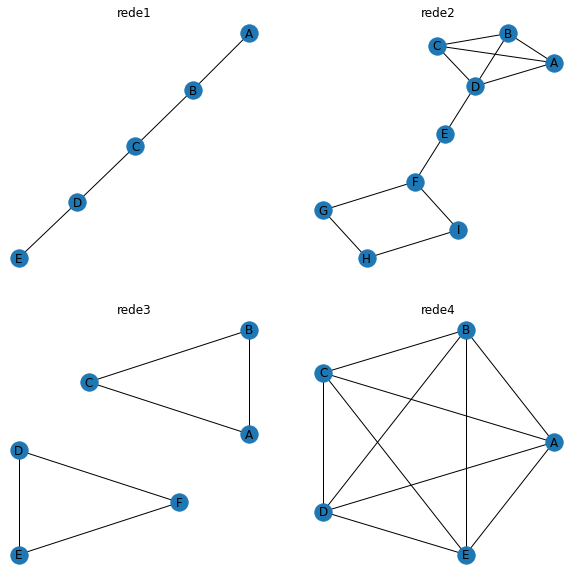

In [2]:
#Exibo as as redes que usaremos.
#Vou imprimir as quatro redes usando o a biblioteca plt.
fig, ax = plt.subplots(2,2,figsize=(10, 10)) # crio uma figura (fig) que separo em 4 parte chamadas de subplots (2,2), tipo matriz 2x2. ax vai ser utilizado para referenciar as posições dessa "matriz"

#As minhas redes estão em uma lista (listaRedesNX) e eu quero exibir elas em uma "matriz 2x2". Vou percorrer a lista e dinamicamente acessar os indices da "matriz"
linha=0
coluna=0
for rede in listaRedesNX:
    if(coluna==2): #Esse 2 é hardcoded mas serve pq sei qtas redes tenho. Se não soubesse teria que melhorar a lógica
        coluna=0
        linha+=1
    # Seleciono a posicao do subplot, add titulo e o plot
    plt.sca(ax[linha,coluna])
    ax[linha,coluna].set_title(rede)
    ax[linha,coluna] = nx.draw_kamada_kawai(listaRedesNX[rede],with_labels=True)    
    coluna+=1
    
#Exibo o gráfico
plt.show()

<h1 style="text-align:center"> Exemplos de DFS </h1>

<h2> Rede1 </h2>

DFS Rede1 - Vértice Raiz = A:  [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E')]
DFS Rede1 - Vértice Raiz = C:  [('C', 'B'), ('B', 'A'), ('C', 'D'), ('D', 'E')]


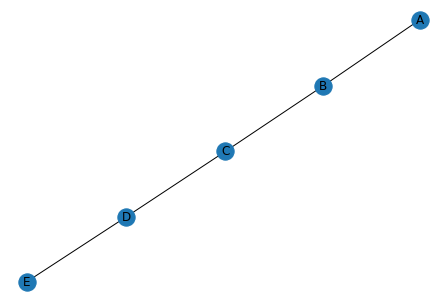

In [3]:
#O método def_edges retorna a ordem das arestas visitas

listaAresta1 = list(nx.dfs_edges(listaRedesNX['rede1'], source='A'))
print("DFS Rede1 - Vértice Raiz = A: ", listaAresta1)

listaAresta2 = list(nx.dfs_edges(listaRedesNX['rede1'], source='C'))
print("DFS Rede1 - Vértice Raiz = C: ", listaAresta2)

#imprimo o grafo para ajudar a visualizar 
nx.draw_kamada_kawai(listaRedesNX['rede1'],with_labels=True)

Grafo referente a DFS Rede1 - Vértice Raiz = C:  [('C', 'B'), ('B', 'A'), ('C', 'D'), ('D', 'E')]

O algotimo de layout apresenta o grafo como uma lista, mas veja que se 'puxarmos' o vértice C, teriámos uma árvore.


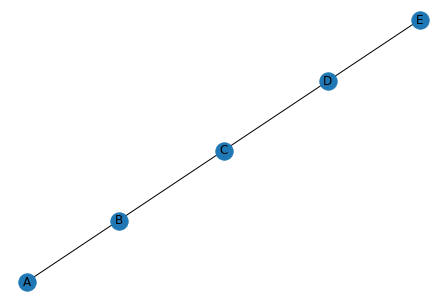

In [4]:
#Observem que a travessia retorna a sequencia de arestas percorridas. É possível montar um grafo que reflete esse caminho
print("Grafo referente a DFS Rede1 - Vértice Raiz = C: ", listaAresta2)
G = nx.from_edgelist(listaAresta2)
nx.draw(G,with_labels=True)
print("\nO algotimo de layout apresenta o grafo como uma lista, mas veja que se 'puxarmos' o vértice C, teriámos uma árvore.")

<h2> Rede2 </h2>

DFS Rede2 - Vértice Raiz = A:  [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I')]
DFS Rede2 - Vértice Raiz = C:  [('C', 'A'), ('A', 'B'), ('B', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I')]


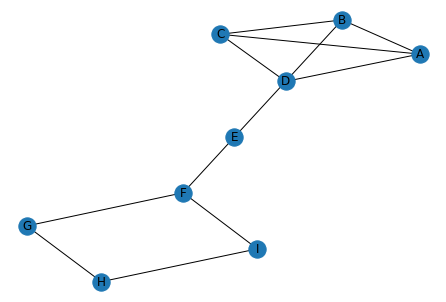

In [5]:
#O método def_edges retorna a ordem das arestas visitas

listaAresta3 = list(nx.dfs_edges(listaRedesNX['rede2'], source='A'))
print("DFS Rede2 - Vértice Raiz = A: ", listaAresta3)

listaAresta4 = list(nx.dfs_edges(listaRedesNX['rede2'], source='C'))
print("DFS Rede2 - Vértice Raiz = C: ", listaAresta4)

#imprimo o grafo para ajudar a visualizar 
nx.draw_kamada_kawai(listaRedesNX['rede2'],with_labels=True)

Grafo referente a DFS Rede2 - Vértice Raiz = C:  [('C', 'A'), ('A', 'B'), ('B', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I')]

Vejam que a travesia mantem o número vértices, mas remove arestas. Os ciclos (ex: F I H G) se tornam uma 'linha'


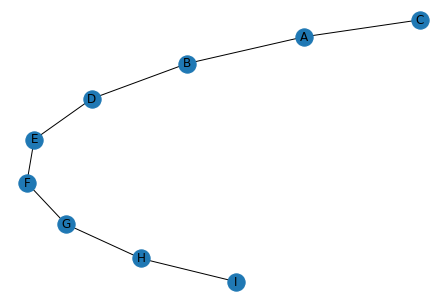

In [6]:
#Observem que a travessia retorna a sequencia de arestas percorridas. É possível montar um grafo que reflete esse caminho
print("Grafo referente a DFS Rede2 - Vértice Raiz = C: ", listaAresta4)
G = nx.from_edgelist(listaAresta4)
nx.draw(G,with_labels=True)
print("\nVejam que a travesia mantem o número vértices, mas remove arestas. Os ciclos (ex: F I H G) se tornam uma 'linha'")

<h2> Rede 4 </h2>

DFS Rede2 - Vértice Raiz = A:  [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E')]
DFS Rede2 - Vértice Raiz = C:  [('C', 'A'), ('A', 'B'), ('B', 'D'), ('D', 'E')]


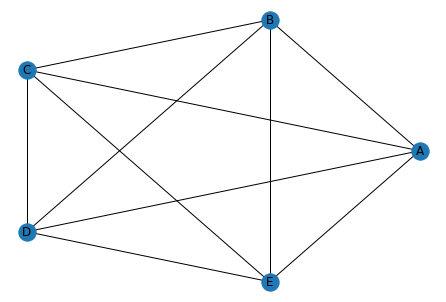

In [7]:
#O método def_edges retorna a ordem das arestas visitas

listaAresta5 = list(nx.dfs_edges(listaRedesNX['rede4'], source='A'))
print("DFS Rede2 - Vértice Raiz = A: ", listaAresta5)

listaAresta6 = list(nx.dfs_edges(listaRedesNX['rede4'], source='C'))
print("DFS Rede2 - Vértice Raiz = C: ", listaAresta6)

#imprimo o grafo para ajudar a visualizar 
nx.draw_kamada_kawai(listaRedesNX['rede4'],with_labels=True)

Grafo referente a DFS Rede4 - Vértice Raiz = C:  [('C', 'A'), ('A', 'B'), ('B', 'D'), ('D', 'E')]

Reforçando o efeito de remover ciclos vistos na rede 2


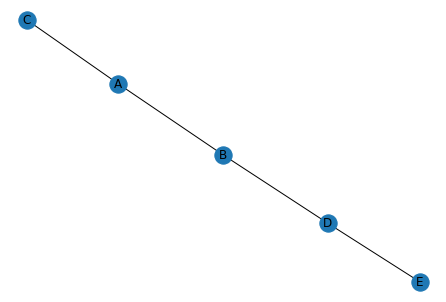

In [8]:
print("Grafo referente a DFS Rede4 - Vértice Raiz = C: ", listaAresta6)
G = nx.from_edgelist(listaAresta6)
nx.draw(G,with_labels=True)
print("\nReforçando o efeito de remover ciclos vistos na rede 2")

<h1 style="text-align:center"> Exemplos de BFS </h1>
Vou repetir as mesmas travessiais que fiz com o DFS

<h2> Rede 1 </h2>

BFS Rede1 - Vértice Raiz = A:  [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E')]
BFS Rede1 - Vértice Raiz = C:  [('C', 'B'), ('C', 'D'), ('B', 'A'), ('D', 'E')]


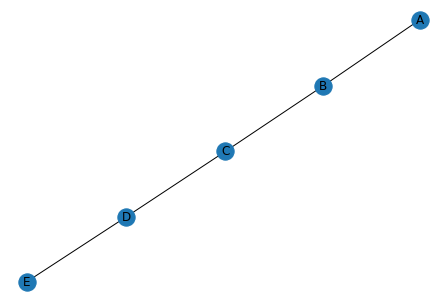

In [9]:
#O método def_edges retorna a ordem das arestas visitas

listaArestaBFS1 = list(nx.bfs_edges(listaRedesNX['rede1'], source='A'))
print("BFS Rede1 - Vértice Raiz = A: ", listaArestaBFS1)

listaArestaBFS2 = list(nx.bfs_edges(listaRedesNX['rede1'], source='C'))
print("BFS Rede1 - Vértice Raiz = C: ", listaArestaBFS2)

#imprimo o grafo para ajudar a visualizar 
nx.draw_kamada_kawai(listaRedesNX['rede1'],with_labels=True)

<h2> Rede 2 </h2>

BFS Rede2 - Vértice Raiz = A:  [('A', 'B'), ('A', 'C'), ('A', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('F', 'I'), ('G', 'H')]
BFS Rede2 - Vértice Raiz = C:  [('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('F', 'I'), ('G', 'H')]

Comparando a lista de aresta com a do DFS é possível ver que a diferença das travessias e como que o BFS 'divide' o grafo em niveis
Lista de aresta usando DFS [('C', 'A'), ('A', 'B'), ('B', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I')]


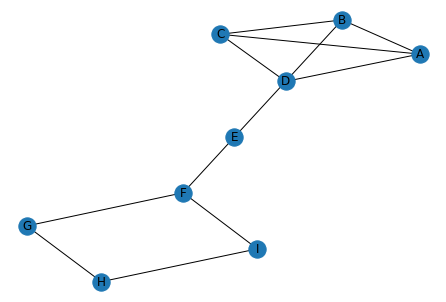

In [10]:
#O método def_edges retorna a ordem das arestas visitas

listaArestaBFS3 = list(nx.bfs_edges(listaRedesNX['rede2'], source='A'))
print("BFS Rede2 - Vértice Raiz = A: ", listaArestaBFS3)

listaArestaBFS4 = list(nx.bfs_edges(listaRedesNX['rede2'], source='C'))
print("BFS Rede2 - Vértice Raiz = C: ", listaArestaBFS4)

#imprimo o grafo para ajudar a visualizar 
nx.draw_kamada_kawai(listaRedesNX['rede2'],with_labels=True)

print("\nComparando a lista de aresta com a do DFS é possível ver que a diferença das travessias e como que o BFS 'divide' o grafo em niveis")
print("Lista de aresta usando DFS",listaAresta4)

Grafo referente a BFS Rede2 - Vértice Raiz = C:  [('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('F', 'I'), ('G', 'H')]

Comparando ao DFS, ainda temos a remoção de ciclos, porém o grafo original não é reduzido apenas a uma 'linha' 


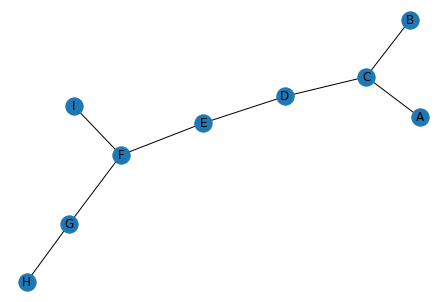

In [11]:
print("Grafo referente a BFS Rede2 - Vértice Raiz = C: ", listaArestaBFS4)
G = nx.from_edgelist(listaArestaBFS4)
nx.draw(G,with_labels=True)
print("\nComparando ao DFS, ainda temos a remoção de ciclos, porém o grafo original não é reduzido apenas a uma 'linha' ")

<h2> Rede 4 </h2>

BFS Rede4 - Vértice Raiz = A:  [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E')]
BFS Rede4 - Vértice Raiz = C:  [('C', 'A'), ('C', 'B'), ('C', 'D'), ('C', 'E')]


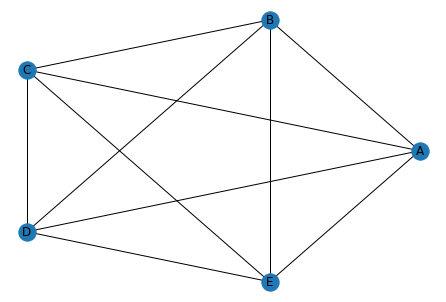

In [12]:
#O método def_edges retorna a ordem das arestas visitas

listaArestaBFS5 = list(nx.bfs_edges(listaRedesNX['rede4'], source='A'))
print("BFS Rede4 - Vértice Raiz = A: ", listaArestaBFS5)

listaArestaBFS6 = list(nx.bfs_edges(listaRedesNX['rede4'], source='C'))
print("BFS Rede4 - Vértice Raiz = C: ", listaArestaBFS6)

#imprimo o grafo para ajudar a visualizar 
nx.draw_kamada_kawai(listaRedesNX['rede4'],with_labels=True)


Grafo referente a BFS Rede4 - Vértice Raiz = C:  [('C', 'A'), ('C', 'B'), ('C', 'D'), ('C', 'E')]

Comparando ao DFS, ainda temos a remoção de ciclos, porém o grafo original não é reduzido apenas a uma 'linha' 


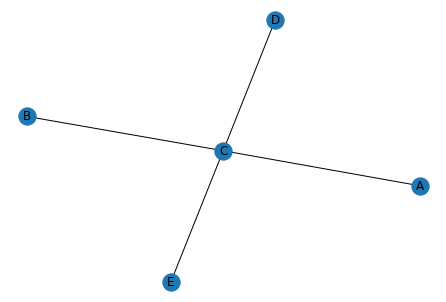

In [13]:
print("Grafo referente a BFS Rede4 - Vértice Raiz = C: ", listaArestaBFS6)
G = nx.from_edgelist(listaArestaBFS6)
nx.draw(G,with_labels=True)
print("\nComparando ao DFS, ainda temos a remoção de ciclos, porém o grafo original não é reduzido apenas a uma 'linha' ")

<h1 style="text-align:center"> Exemplos Finais - Para praticar no papel </h1>
<p>Para ajudar a entender a diferença e ordem dos dois tipos de travessia, criei um grafo novo chamado Maze. Além desse grafo ser diferente dos outros, na hora de imprimir o grafo resultante da travessia BFS e DFS, eu adicionei como peso das arestas a ordem em que a travessia acontece. </p>
<p>Observem que faço duas travessias com cada método, começando em ambos nos vértices 1 e 4 </p>
<p>Não se preocupe em entender o código das duas próximas células. O importante é você analisar as imagems geradas e praticar no papel a execução do BFS e DFS e conferir com as sequências 'plotadas' <p>

In [14]:
#Essa função recebe uma lista de aresta e imprime um grafo cujo peso da aresta é a ordem das arestas recebidas
def exibeGrafoOrdemTravessia(listaAresta):
    #acrescenta a ordem dos elementos da lista como peso na aresta
    listaArestaOrdemComoPeso=[]
    cont=1
    for aresta in listaAresta:
        listaArestaOrdemComoPeso.append((aresta[0],aresta[1],{'weight':cont}))
        cont+=1
    
    #cria um novo grafo com as aresta que tem peso
    G = nx.from_edgelist(listaArestaOrdemComoPeso)
    #para colocar os pesos no plot, é necessário pega a posição de cada vertice
    pos=nx.planar_layout(G)
    plt.figure()
    nx.draw_planar(G,with_labels=True)   
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.show()

Grafo Maze Original


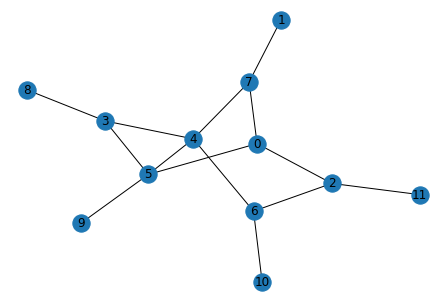

Maze BFS - Root = 1 [(1, 7), (7, 0), (7, 4), (0, 2), (0, 5), (4, 3), (4, 6), (2, 11), (5, 9), (3, 8), (6, 10)]


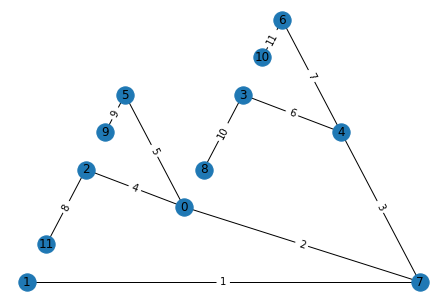

Maze BFS - Root = 4 [(4, 3), (4, 5), (4, 7), (4, 6), (3, 8), (5, 0), (5, 9), (7, 1), (6, 2), (6, 10), (2, 11)]


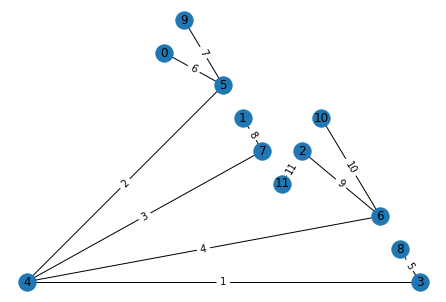


=======ATENÇÃO QUE AGORA É DFS=======

Maze DFS - Root = 1 [(1, 7), (7, 0), (0, 2), (2, 6), (6, 4), (4, 3), (3, 5), (5, 9), (3, 8), (6, 10), (2, 11)]


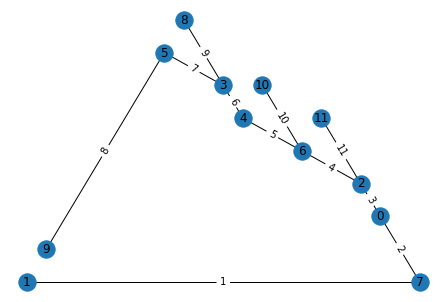

Maze DFS - Root = 4 [(4, 3), (3, 5), (5, 0), (0, 2), (2, 6), (6, 10), (2, 11), (0, 7), (7, 1), (5, 9), (3, 8)]


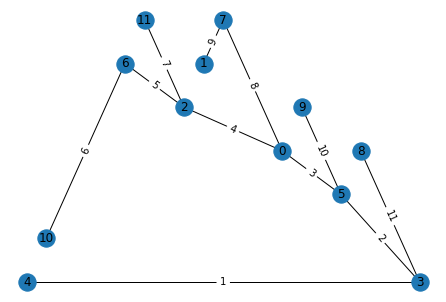

In [15]:
maze = nx.sedgewick_maze_graph()
maze.add_edge(3,8)
maze.add_edge(5,9)
maze.add_edge(6,10)
maze.add_edge(2,11)
listaAresta = list(nx.bfs_edges(maze,1))

plt.figure()
print("Grafo Maze Original")
nx.draw_kamada_kawai(maze,with_labels=True)
plt.show()


print("Maze BFS - Root = 1",listaAresta)
exibeGrafoOrdemTravessia(listaAresta)


listaAresta = list(nx.bfs_edges(maze,4))
print("Maze BFS - Root = 4",listaAresta)
exibeGrafoOrdemTravessia(listaAresta)


print("\n=======ATENÇÃO QUE AGORA É DFS=======\n")


#Atenção que agora é DFS
listaAresta = list(nx.dfs_edges(maze,1))
print("Maze DFS - Root = 1",listaAresta)
exibeGrafoOrdemTravessia(listaAresta)

listaAresta = list(nx.dfs_edges(maze,4))
print("Maze DFS - Root = 4",listaAresta)
exibeGrafoOrdemTravessia(listaAresta)